# Experiment Design Report #2
202021682 Qiushi Pan

I am doing analyzation to my research again, so the introduction is mostly the same. However, I made a different analyzation from last time.

### * Introduction: Describe your scientific question, its relevance and why do you need an experiment for it.

My research area is Machine Learning (ML). My current research topic is the adaptation of ML to e-learning systems. On e-learning systems Such as MOOCs, students take lectures on computer devices. Then the systems will record the students’ study logs. Many people try to utilize these big data. An adaptation is called Knowledge Tracing (KT), which tries to estimate whether students will answer correctly after given a sequence of his/her study records. We follow related research to adapt ML to the KT task, which is called Deep Knowledge Tracing (DKT). DKT made huge progress compared to previous models in terms of accuracy. In our research, however, we pointed out there might be some problems in the predictions: We found that when a student answers correctly in a row the model could occasionally predict the student’s ability to be rather low. To evaluate this phenomenon, we used the NDCG function to calculate the score between the number of correct answers in the input sequence and the prediction score of the model to give that input. This score indicates how well the model takes the input sequence into consideration. 

Then we examined the model trained on the open dataset. We found that even when the model is providing a good accuracy score, the NDCG score can be small. Meaning that if the students behave Too much differently from what has been recorded in the log data, for example, if the student keeps practicing on the same topic too long, the model can predict poorly even if the students keep answering correctly.

---

In this report, I analyze whether each KC is being predicted differently, by seeing its mean and std distribution.

### * Experiment Design: Describe how you will collect data to answer your scientific question; Make sure to mention any parameters or factors that must be controlled;

Count the occurrence of Each KC pair. And examine if there is difference in its distribution, by seeing its mean ans std. 

Scatter plot the KC prediction.


### * Data Collection: Report on your data collection, if anything happened outside of expected from the experimental design;

I use the Synthetic open dataset. Here I count the occurrence of each KC in the dataset.

The data collection code is shown below. Since I use this as my research, I can't provide the raw data. However, as I share the source code, it is shown to be reproducible.

Analysis is after the code.

## Conclusion
The std is very small. And each KC prediction is near 0.5.
The std is small, so each prediction is not making too much difference.
This means I should use larger dataset next time for better results.

In [1]:
import os
import pandas as pd
import numpy as np
import json
import pickle
from collections import defaultdict
from pathlib import Path
from statistics import mean, stdev
from sklearn.metrics import ndcg_score, dcg_score
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import load_source
from src.config import Config, get_option_fallback
from src.path import get_best_model_paths, get_exp_paths, get_report_path, load_json, load_rep_cfg, get_exp_names
from knowledge_tracing.trainer import Trainer

In [2]:
# projectdir = Path('/code')
projectdir = Path('..')
assert projectdir.exists()

# Common Functions

In [42]:
report = load_json(projectdir / 'output/debug/no_overwrite/report/20200610-2049/duo_context.json')

19->20 40000 0.5194472120557148
mean: 0.5137489450573921, std: 0.0013610221129392074


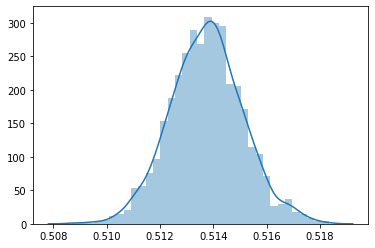

20->21 40000 0.4390714366043314
mean: 0.48646478964388373, std: 0.0016632881007416157


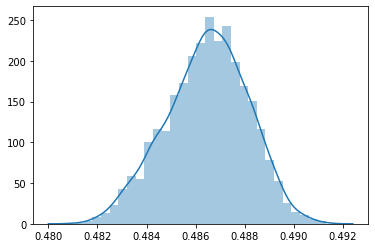

21->22 40000 0.4552968760431766
mean: 0.4789284228384495, std: 0.0013597086161462814


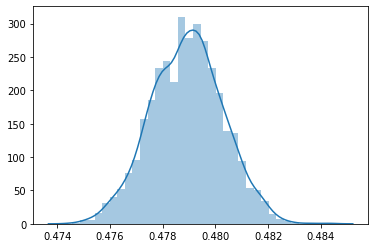

22->23 40000 0.5274147530928192
mean: 0.49534733390808106, std: 0.0011823238901189556


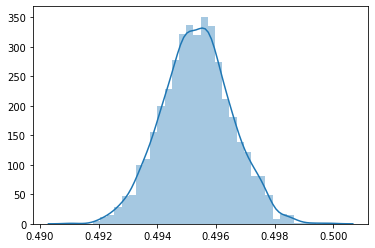

23->24 40000 0.5926763847569616
mean: 0.5261106391549111, std: 0.0014030230419423359


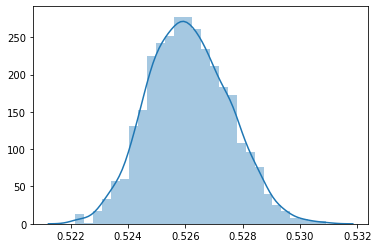

24->25 40000 0.5269508998147219
mean: 0.4899337495714426, std: 0.0019268624966699661


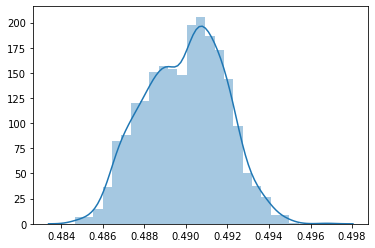

25->26 40000 0.5142780576370511
mean: 0.4655031735450029, std: 0.0016076058694973797


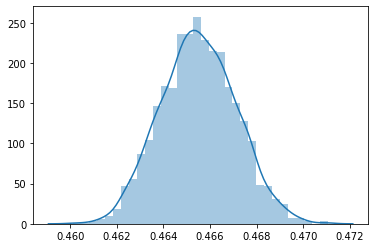

26->27 40000 0.5188933722944424
mean: 0.4887072553932667, std: 0.0013579948700482435


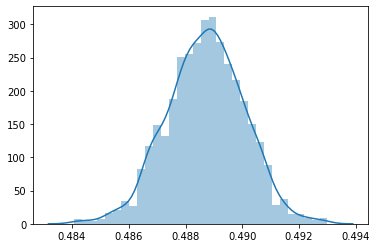

27->28 40000 0.49225678491627123
mean: 0.5257715173363685, std: 0.001403282762231755


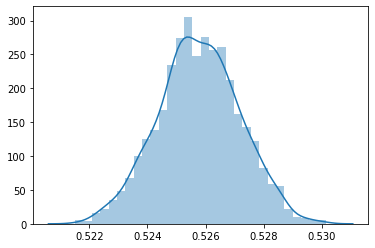

28->29 40000 0.44855769936920886
mean: 0.5310500037968159, std: 0.0015155489220560086


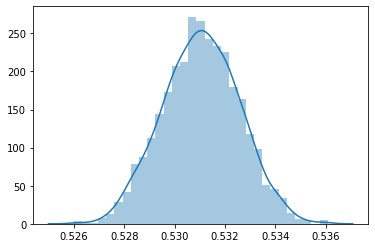

29->30 40000 0.49006737141507467
mean: 0.5452018522024155, std: 0.0012189219054879034


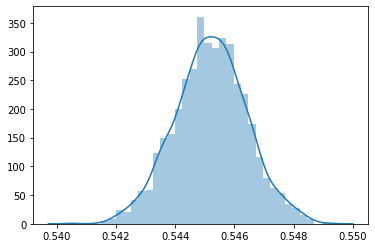

30->31 38000 0.6681699806458941
mean: 0.535159272134304, std: 0.0014728194751275775


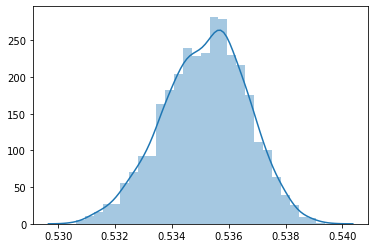

31->32 36000 0.5000483553341247
mean: 0.5138303486704826, std: 0.0011385462384949677


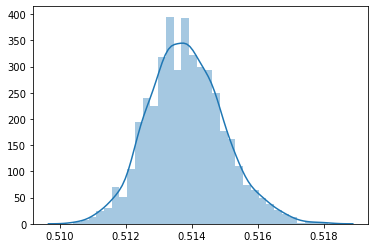

32->33 34000 0.5254767036310147
mean: 0.49917485415935514, std: 0.001248304421649317


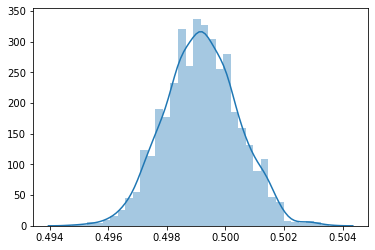

33->34 32000 0.46764094692552194
mean: 0.4942764713317156, std: 0.001329687661776577


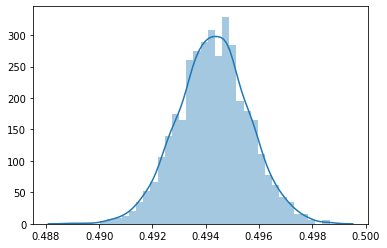

34->35 30000 0.494809328395556
mean: 0.5108118594884873, std: 0.0011957239493934904


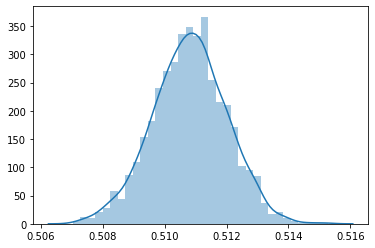

35->36 28000 0.4995149264074064
mean: 0.5244326646625995, std: 0.0013619624322905109


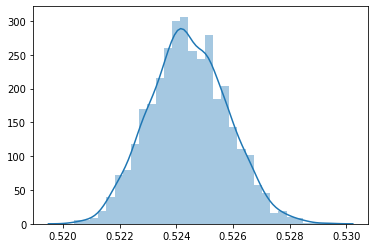

36->37 26000 0.39289752943127176
mean: 0.5172389871776104, std: 0.0014910356219616238


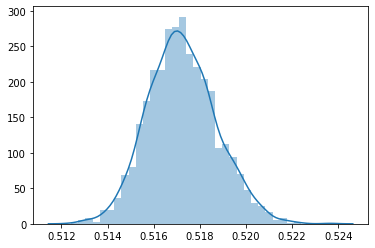

37->38 24000 0.5212667877830623
mean: 0.5351755342185497, std: 0.0011677739867935247


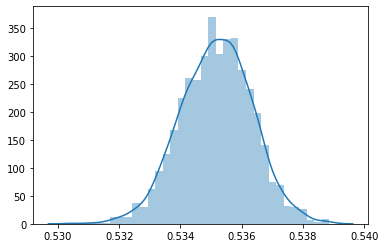

38->39 22000 0.45632976190476193
mean: 0.5473358317911625, std: 0.0017950508414964854


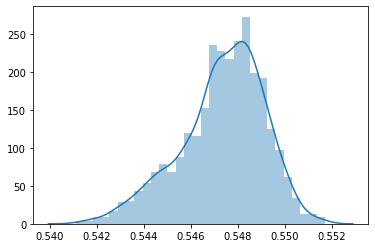

39->40 20000 0.5638241160254887
mean: 0.521301897585392, std: 0.001368598639858338


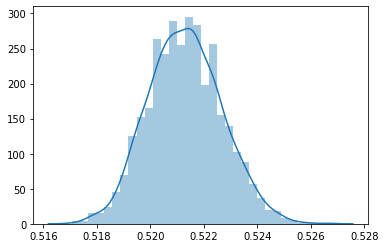

40->41 18000 0.49475405717263465
mean: 0.509145993411541, std: 0.0015092665295302731


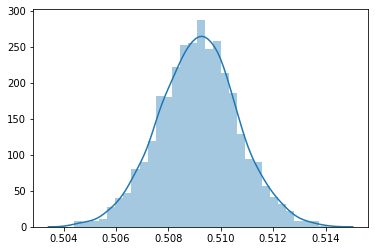

41->42 16000 0.5311960679992906
mean: 0.5105046601295471, std: 0.0016466676106054636


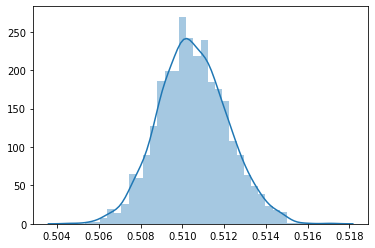

42->43 14000 0.47849616851107163
mean: 0.5314524818956852, std: 0.0015556543626175474


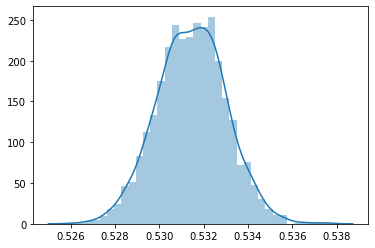

43->44 12000 0.5515141003020425
mean: 0.5182852306962014, std: 0.0013470678316475828


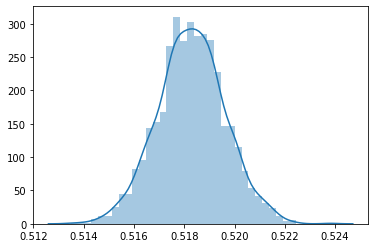

44->45 10000 0.39034512887723893
mean: 0.5156504848003387, std: 0.0013228316243428869


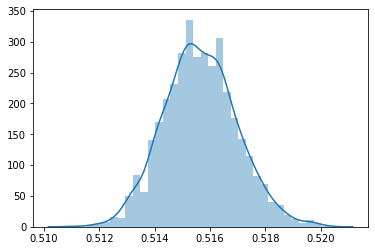

45->46 8000 0.5044639485092689
mean: 0.4966248540282249, std: 0.0010306283888517943


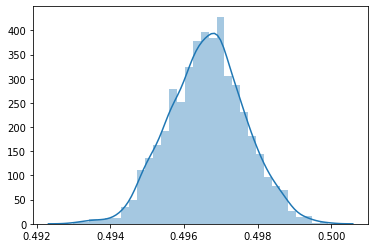

46->47 6000 0.5149600109710046
mean: 0.5086725398898124, std: 0.0012957779606617833


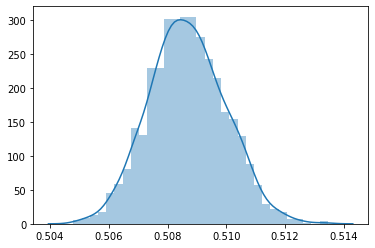

47->48 4000 0.3738545970711415
mean: 0.500007641389966, std: 0.0014620617147879887


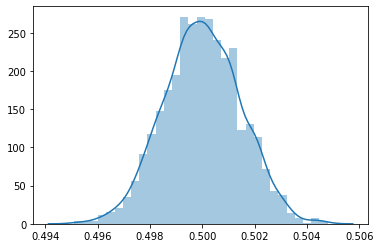

48->49 2000 0.4909331125799372
mean: 0.5174705010950565, std: 0.0013621757219484279


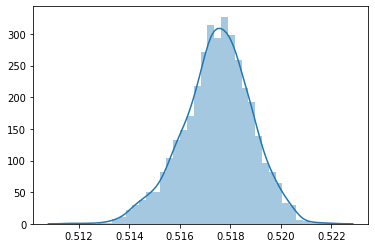

In [57]:
from statistics import mean, stdev
for key, value in report['indicator']['duo_context']['all'][0].items():
    print(key, value['count'][0], value['auc'][0])
    print(f'mean: {mean(value["pred"])}, std: {stdev(value["pred"])}')
    sns.distplot(value['pred'])
    plt.show()